<a href="https://colab.research.google.com/github/ShivinM-17/Tensorflow_practises/blob/main/Medical_cost_prediction_nn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the data

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


To implement this dataset into a neural network, we need to process it into numerical variables (for all columns).

In [ ]:
# Here, we can see that the column "sex" is a categorical variable, with only male and female
# records. Therefore, applying one-hot encoding on it.

insurance_onehot = pd.get_dummies(insurance)

In [ ]:
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


**Charges is the column we want to predict**

### Splitting the data

In [ ]:
X = insurance_onehot.drop("charges", axis=1)
y = insurance_onehot["charges"]

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Creating training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.29,
                                                    random_state=42)

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
83,48,41.230,4,1,0,1,0,0,1,0,0
129,38,34.700,2,0,1,1,0,0,0,0,1
1159,32,41.100,0,1,0,1,0,0,0,0,1
1219,38,30.210,3,1,0,1,0,0,1,0,0
737,26,23.700,2,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
966,51,24.795,2,0,1,0,1,0,1,0,0
328,64,33.800,1,1,0,0,1,0,0,0,1
590,58,29.000,0,1,0,1,0,0,0,0,1
318,44,27.645,0,1,0,1,0,0,1,0,0


In [ ]:
y_train

83      11033.66170
129      6082.40500
1159     3989.84100
1219     7537.16390
737      3484.33100
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 949, dtype: float64

In [ ]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
966     23967.38305
328     47928.03000
590     11842.44200
318      7421.19455
1034    12950.07120
Name: charges, Length: 389, dtype: float64

### Making model 1

In [ ]:
# Building a neural network model

# Making a random seed
tf.random.set_seed(42)

# Creating a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100, activation="linear"),
    tf.keras.layers.Dense(1)
])

# Compiling the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=250)

Epoch 1/250
30/30 [==============================] - 6s 4ms/step - loss: 12257.8291 - mae: 12257.8291
Epoch 2/250
30/30 [==============================] - 0s 3ms/step - loss: 7929.4209 - mae: 7929.4209
Epoch 3/250
30/30 [==============================] - 0s 3ms/step - loss: 7457.6528 - mae: 7457.6528
Epoch 4/250
30/30 [==============================] - 0s 3ms/step - loss: 7303.8164 - mae: 7303.8164
Epoch 5/250
30/30 [==============================] - 0s 3ms/step - loss: 7166.5630 - mae: 7166.5630
Epoch 6/250
30/30 [==============================] - 0s 3ms/step - loss: 6990.8467 - mae: 6990.8467
Epoch 7/250
30/30 [==============================] - 0s 3ms/step - loss: 6765.5083 - mae: 6765.5083
Epoch 8/250
30/30 [==============================] - 0s 3ms/step - loss: 6560.7383 - mae: 6560.7383
Epoch 9/250
30/30 [==============================] - 0s 3ms/step - loss: 6436.9150 - mae: 6436.9150
Epoch 10/250
30/30 [==============================] - 0s 3ms/step - loss: 6340.5718 - mae: 6340.57

In [ ]:
# Checking the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3278.6843 - mae: 3278.6843


[3278.684326171875, 3278.684326171875]

In [ ]:
y_train.median(), y_train.mean()

(9500.57305, 13300.388874446786)

It seems that the MAE of the model is too large, thus its gives incorrect values

### Making model 2

In [ ]:
# creating a random seed
tf.random.set_seed(42)

# Creating the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.012),
                          metrics=["mae","mse"])

# Fit the model
insurance_model_2.fit(X_train, y_train, epochs=500)

Epoch 1/500
30/30 [==============================] - 2s 4ms/step - loss: 11245.4365 - mae: 11245.4365 - mse: 267114320.0000
Epoch 2/500
30/30 [==============================] - 0s 3ms/step - loss: 7524.8110 - mae: 7524.8110 - mse: 150597648.0000
Epoch 3/500
30/30 [==============================] - 0s 3ms/step - loss: 7270.1152 - mae: 7270.1152 - mse: 155044976.0000
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 7045.4150 - mae: 7045.4150 - mse: 154244800.0000
Epoch 5/500
30/30 [==============================] - 0s 7ms/step - loss: 6753.2524 - mae: 6753.2524 - mse: 155087248.0000
Epoch 6/500
30/30 [==============================] - 0s 7ms/step - loss: 6476.0259 - mae: 6476.0259 - mse: 154973344.0000
Epoch 7/500
30/30 [==============================] - 0s 7ms/step - loss: 6327.0522 - mae: 6327.0522 - mse: 150895888.0000
Epoch 8/500
30/30 [==============================] - 0s 4ms/step - loss: 6180.8828 - mae: 6180.8828 - mse: 145513632.0000
Epoch 9/500
30/30 [===

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 3274.6799 - mae: 3274.6799 - mse: 42918964.0000


[3274.679931640625, 3274.679931640625, 42918964.0]

In [ ]:
insurance_model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3278.6843 - mae: 3278.6843


[3278.684326171875, 3278.684326171875]

### Making model 3

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fitting the model
history = insurance_model_3.fit(X_train, y_train, epochs=250)

Epoch 1/250
30/30 [==============================] - 1s 3ms/step - loss: 13260.7979 - mae: 13260.7979
Epoch 2/250
30/30 [==============================] - 0s 3ms/step - loss: 13140.4365 - mae: 13140.4365
Epoch 3/250
30/30 [==============================] - 0s 3ms/step - loss: 12905.4697 - mae: 12905.4697
Epoch 4/250
30/30 [==============================] - 0s 3ms/step - loss: 12448.2578 - mae: 12448.2578
Epoch 5/250
30/30 [==============================] - 0s 3ms/step - loss: 11663.1982 - mae: 11663.1982
Epoch 6/250
30/30 [==============================] - 0s 3ms/step - loss: 10516.3984 - mae: 10516.3984
Epoch 7/250
30/30 [==============================] - 0s 3ms/step - loss: 9211.6797 - mae: 9211.6797
Epoch 8/250
30/30 [==============================] - 0s 4ms/step - loss: 8091.3823 - mae: 8091.3823
Epoch 9/250
30/30 [==============================] - 0s 4ms/step - loss: 7556.2388 - mae: 7556.2388
Epoch 10/250
30/30 [==============================] - 0s 4ms/step - loss: 7455.3223 - ma

In [ ]:
# evaluating this model
insurance_model_3.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 3536.1370 - mae: 3536.1370


[3536.136962890625, 3536.136962890625]

Text(0, 0.5, 'Loss')

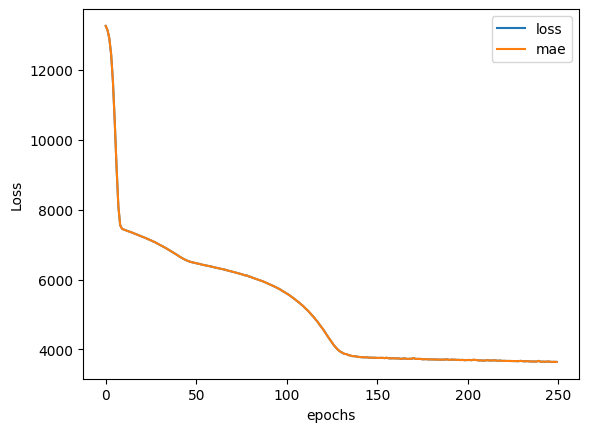

In [ ]:
# Plotting history (also called as loss curve)
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("Loss")

### Making another model
Self-made (for practise)

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(75, activation="relu"),
    tf.keras.layers.Dense(10, activation="linear"),
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fitting the model
history = insurance_model_4.fit(X_train, y_train, epochs=512)

Epoch 1/512
30/30 [==============================] - 3s 6ms/step - loss: 13198.9141 - mae: 13198.9141
Epoch 2/512
30/30 [==============================] - 0s 6ms/step - loss: 9450.2490 - mae: 9450.2490
Epoch 3/512
30/30 [==============================] - 0s 6ms/step - loss: 7577.2437 - mae: 7577.2437
Epoch 4/512
30/30 [==============================] - 0s 6ms/step - loss: 7069.1201 - mae: 7069.1201
Epoch 5/512
30/30 [==============================] - 0s 6ms/step - loss: 6842.5977 - mae: 6842.5977
Epoch 6/512
30/30 [==============================] - 0s 7ms/step - loss: 6747.6758 - mae: 6747.6758
Epoch 7/512
30/30 [==============================] - 0s 7ms/step - loss: 6721.0273 - mae: 6721.0273
Epoch 8/512
30/30 [==============================] - 0s 6ms/step - loss: 6698.1265 - mae: 6698.1265
Epoch 9/512
30/30 [==============================] - 0s 6ms/step - loss: 6675.8853 - mae: 6675.8853
Epoch 10/512
30/30 [==============================] - 0s 4ms/step - loss: 6689.9380 - mae: 6689.93

In [ ]:
# evaluating this model
insurance_model_4.evaluate(X_test,y_test)

13/13 [==============================] - 0s 3ms/step - loss: 1434.2195 - mae: 1434.2195


[1434.219482421875, 1434.219482421875]

Text(0, 0.5, 'Loss')

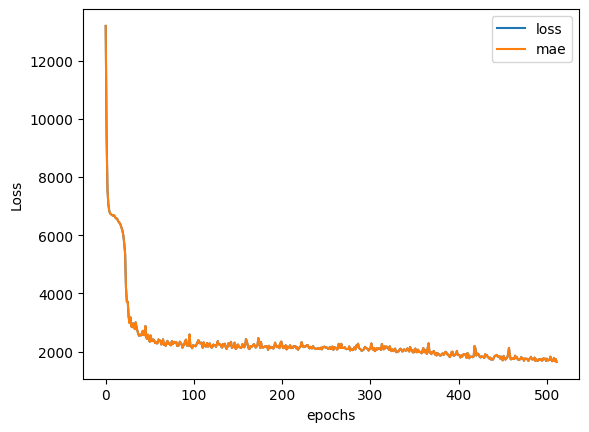

In [ ]:
# Plotting history (also called as loss curve)
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("Loss")

NOW, QUESTION ARISES ON TILL WHEN SHOULD WE STOP TRAINING THE MODEL, OR FOR HOW MANY EPOCHS SHOULD WE RUN OUR MODEL FOR?

IN THIS CASE, WE WILL USE THE EARLYSTOPPING CALLBACK TECHNIQUE FROM TENSORFLOW

### Model creation with early stopping

In [ ]:
# Creating a seed
tf.random.set_seed(42)

# Making a early stopping callback variable
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

# Creating the model
new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(75, activation="relu"),
    tf.keras.layers.Dense(175, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(75, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(20, activation="linear"),
])

# compiling the model
new_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.012),
                  metrics=["mae"])

# Fitting the model
history = new_model.fit(X_train, y_train, epochs=512,
                        callbacks=[callback])

Epoch 1/512
30/30 [==============================] - 2s 4ms/step - loss: 8949.0918 - mae: 8949.0918
Epoch 2/512
30/30 [==============================] - 0s 4ms/step - loss: 7110.7734 - mae: 7110.7734
Epoch 3/512
30/30 [==============================] - 0s 4ms/step - loss: 6759.2017 - mae: 6759.2017
Epoch 4/512
30/30 [==============================] - 0s 4ms/step - loss: 6465.5474 - mae: 6465.5474
Epoch 5/512
30/30 [==============================] - 0s 4ms/step - loss: 6108.0527 - mae: 6108.0527
Epoch 6/512
30/30 [==============================] - 0s 4ms/step - loss: 5732.9941 - mae: 5732.9941
Epoch 7/512
30/30 [==============================] - 0s 4ms/step - loss: 4644.3159 - mae: 4644.3159
Epoch 8/512
30/30 [==============================] - 0s 4ms/step - loss: 3803.0623 - mae: 3803.0623
Epoch 9/512
30/30 [==============================] - 0s 4ms/step - loss: 3448.5627 - mae: 3448.5627
Epoch 10/512
30/30 [==============================] - 0s 4ms/step - loss: 3307.9656 - mae: 3307.9656

In [ ]:
# evaluating this model
new_model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 3ms/step - loss: 1661.7148 - mae: 1661.7148


[1661.71484375, 1661.71484375]

Text(0, 0.5, 'Loss')

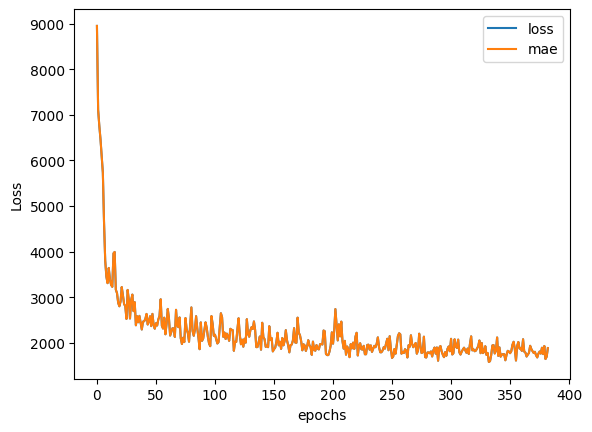

In [ ]:
# Plotting history (also called as loss curve)
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("Loss")

### Preprocessing the data (Normalisation and standardisation)

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

<Axes: ylabel='Frequency'>

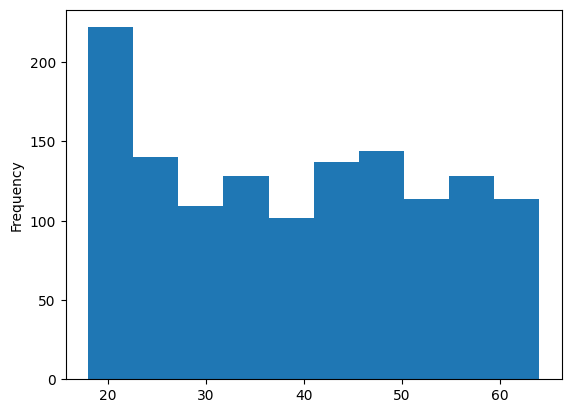

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

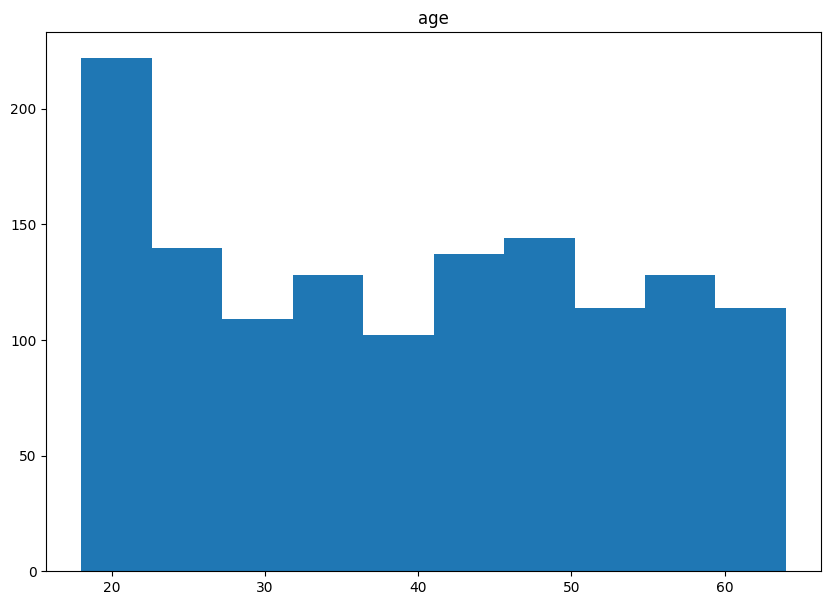

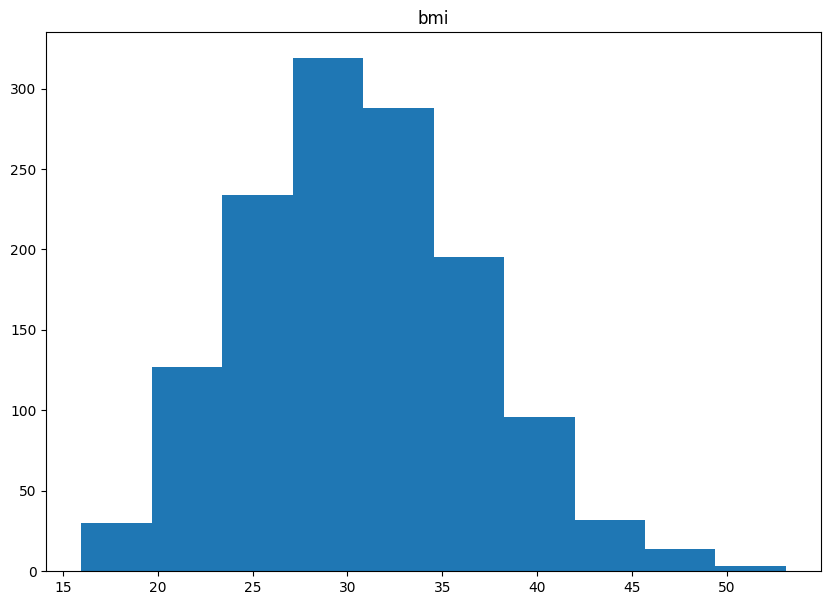

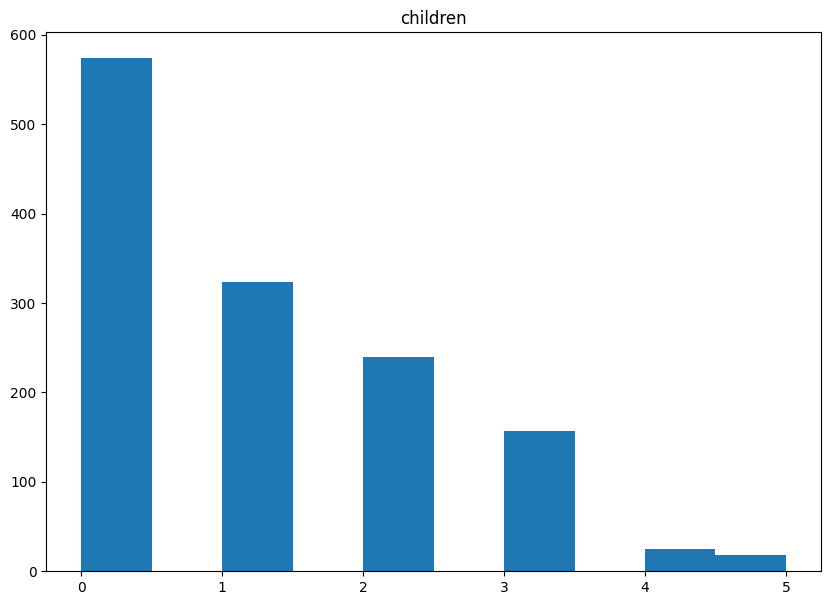

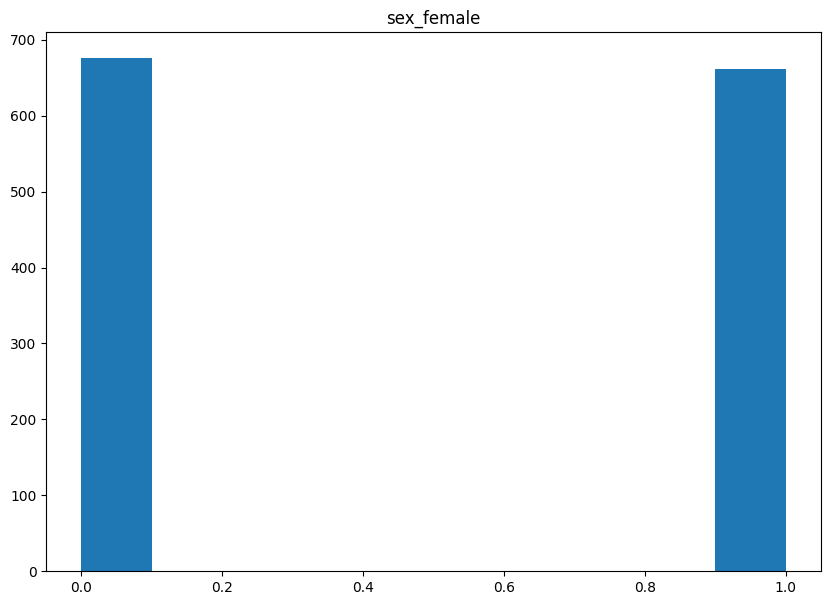

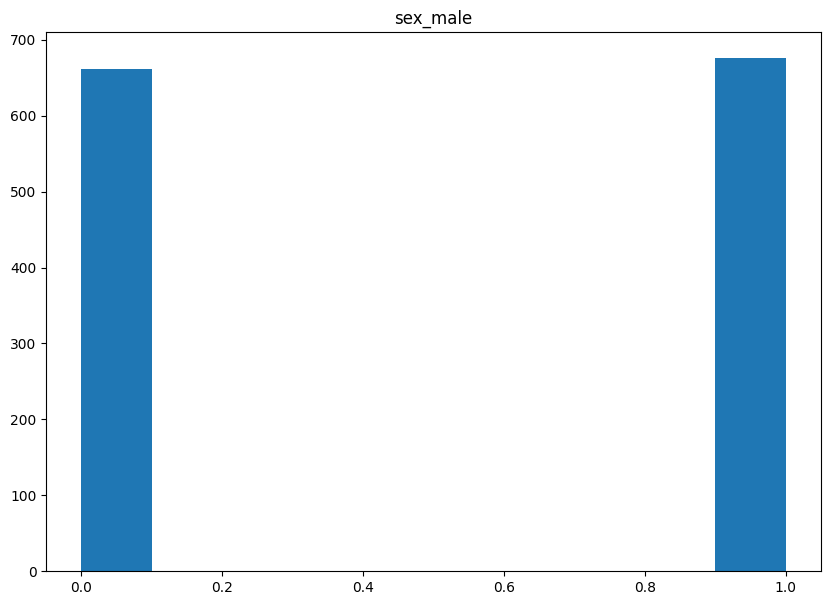

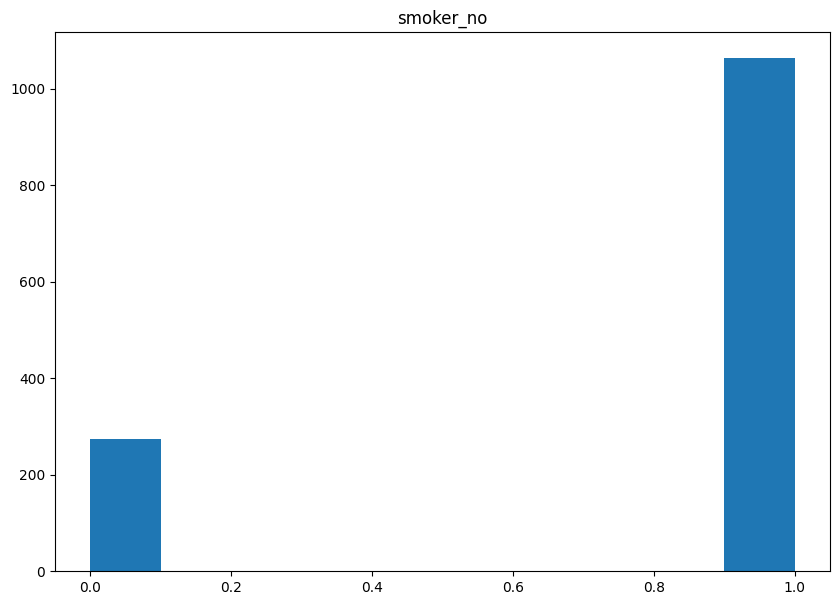

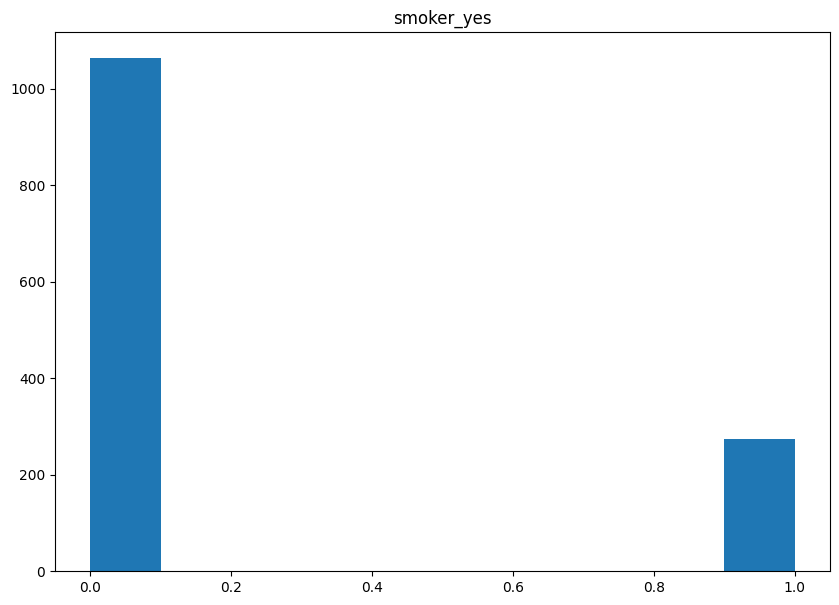

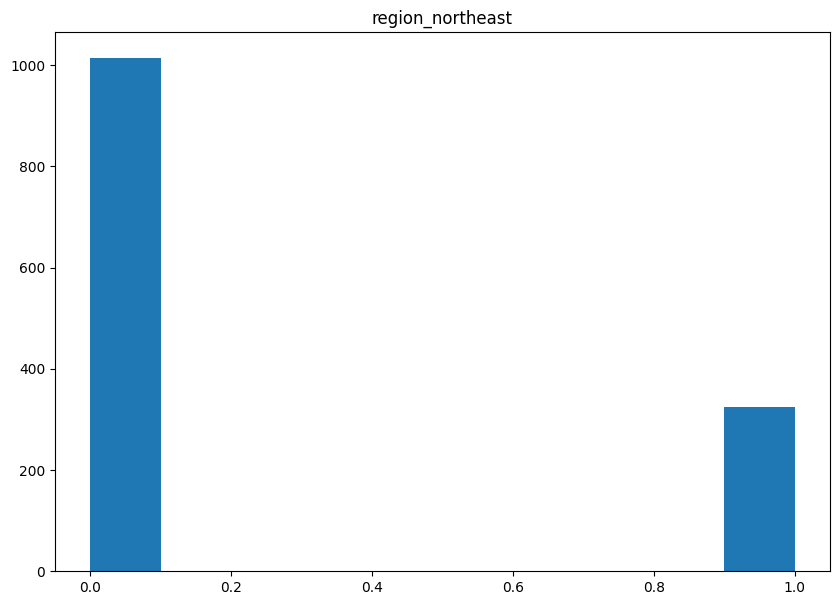

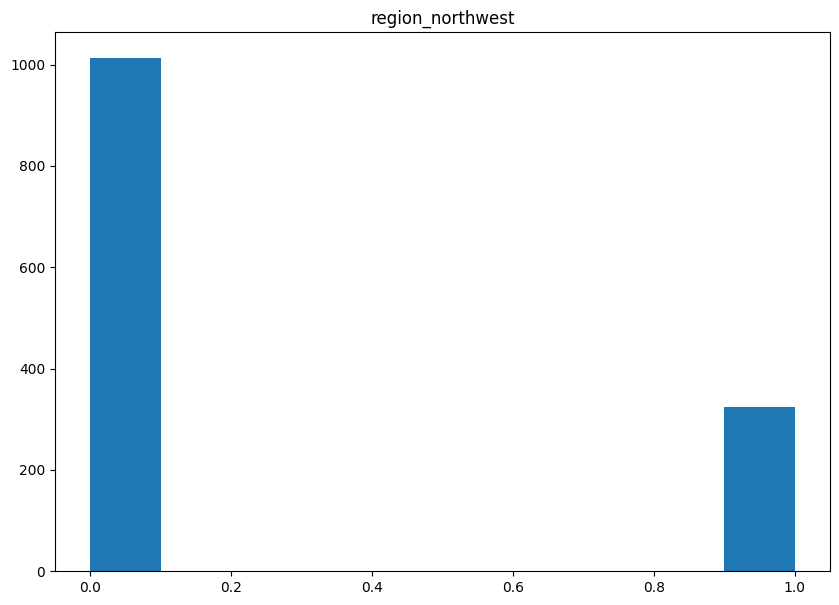

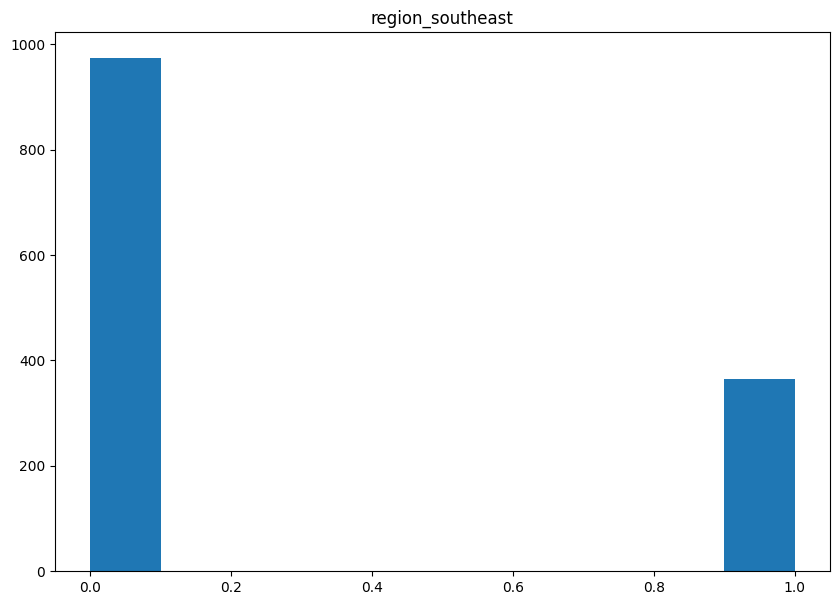

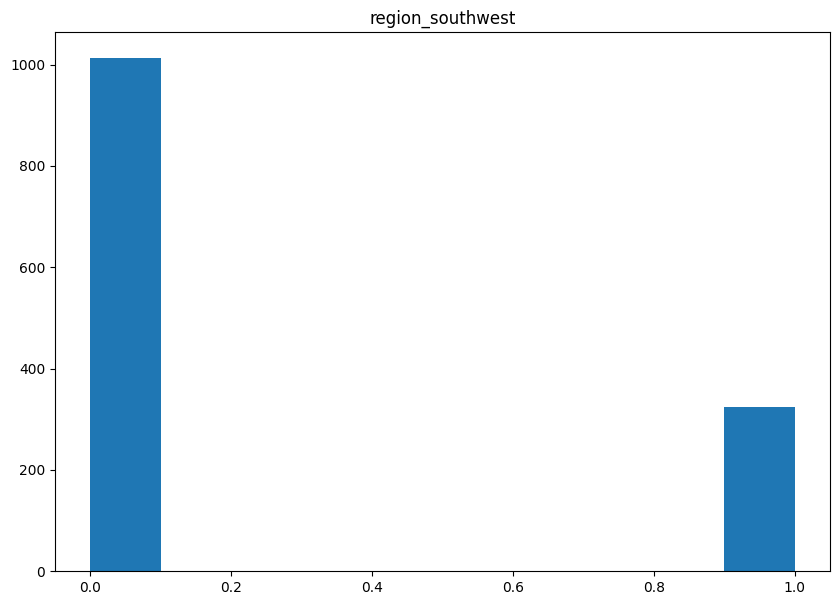

In [ ]:

for i, column in enumerate(X.columns):
    plt.figure(figsize=(10, 7))
    plt.hist(X[column])
    plt.title(column)
    plt.show()

#### Performing the techniques

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

# Create X and y
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Build train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.33,
                                                    random_state=42)
# Fit the column transformer to the training data
ct.fit(X_train)

# Transform training and test data with the column transformer that was fitted with training data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train_normal[0]

array([0.54347826, 0.24535916, 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

Now, we have pre-processed the data, now we will make a neural network for it

In [ ]:
# Make a random seed
tf.random.set_seed(42)

# Making a early stopping callback variable
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

# Make the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(75, activation="relu"),
    tf.keras.layers.Dense(10, activation="linear"),
])

# Compiling the model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.012),
                metrics=["mae"])

# Fitting the data
history = model_5.fit(X_train_normal, y_train,
                      epochs=1000, callbacks=[callback])


Epoch 1/1000
28/28 [==============================] - 2s 4ms/step - loss: 11620.6826 - mae: 11620.6826
Epoch 2/1000
28/28 [==============================] - 0s 3ms/step - loss: 7855.5010 - mae: 7855.5010
Epoch 3/1000
28/28 [==============================] - 0s 4ms/step - loss: 5353.2661 - mae: 5353.2661
Epoch 4/1000
28/28 [==============================] - 0s 3ms/step - loss: 3873.0918 - mae: 3873.0918
Epoch 5/1000
28/28 [==============================] - 0s 4ms/step - loss: 3454.7986 - mae: 3454.7986
Epoch 6/1000
28/28 [==============================] - 0s 3ms/step - loss: 3411.8137 - mae: 3411.8137
Epoch 7/1000
28/28 [==============================] - 0s 3ms/step - loss: 3487.3079 - mae: 3487.3079
Epoch 8/1000
28/28 [==============================] - 0s 3ms/step - loss: 3476.7500 - mae: 3476.7500
Epoch 9/1000
28/28 [==============================] - 0s 4ms/step - loss: 3352.1082 - mae: 3352.1082
Epoch 10/1000
28/28 [==============================] - 0s 3ms/step - loss: 3516.6235 - ma

In [ ]:
model_5.evaluate(X_test_normal, y_test)

14/14 [==============================] - 0s 3ms/step - loss: 1493.5980 - mae: 1493.5980


[1493.5980224609375, 1493.5980224609375]

In [ ]:
model_5.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 10)                120       
                                                                 
 dense_82 (Dense)            (None, 100)               1100      
                                                                 
 dense_83 (Dense)            (None, 100)               10100     
                                                                 
 dense_84 (Dense)            (None, 75)                7575      
                                                                 
 dense_85 (Dense)            (None, 10)                760       
                                                                 
Total params: 19,655
Trainable params: 19,655
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'Loss')

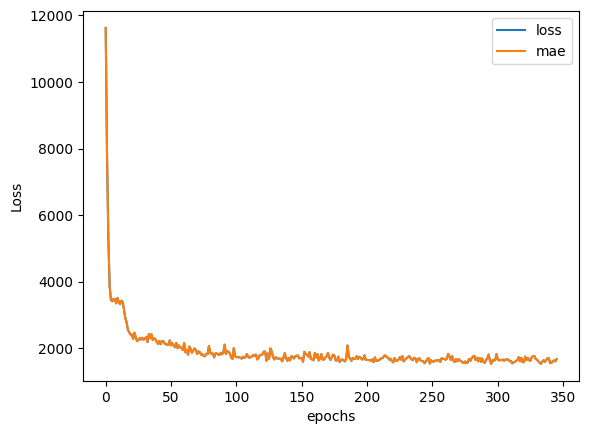

In [ ]:
# Plotting history (also called as loss curve)
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("Loss")